# Titanic Survivor Prediction

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [114]:
train=pd.read_csv("./titanic/train.csv")
test=pd.read_csv("./titanic/test.csv")
submission=pd.read_csv("./titanic/gender_submission.csv")

In [115]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [116]:
train.drop({'Name','Ticket','Cabin'},axis=1,inplace=True)

In [117]:
train=train.replace('male',0)
train=train.replace('female',1)
test=test.replace('male',0)
test=test.replace('female',1)

In [118]:
test.drop({'Name','Ticket','Cabin'},axis=1,inplace=True)

In [119]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

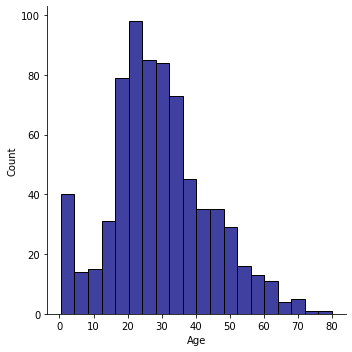

In [120]:
sns.displot(train['Age'],color='navy')

In [121]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,1,38.0,0,0,80.0,NaN
829,830,1,1,1,62.0,0,0,80.0,NaN


In [122]:
train['Embarked']=train['Embarked'].fillna('S')

<AxesSubplot:>

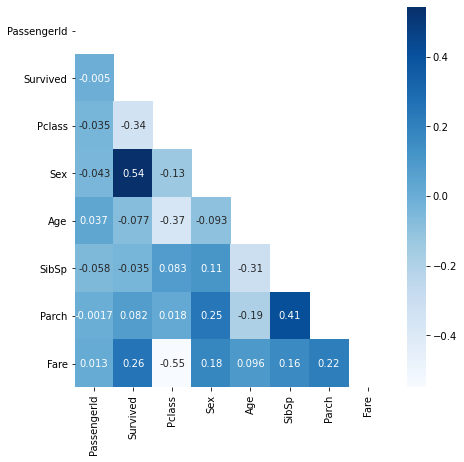

In [123]:
mask=np.zeros_like(train.corr(),dtype=bool)
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(7,7))
sns.heatmap(train.corr(),annot=True,mask=mask,cmap='Blues')

In [124]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,S
887,888,1,1,1,19.0,0,0,30.0000,S
888,889,0,3,1,NaN,1,2,23.4500,S
889,890,1,1,0,26.0,0,0,30.0000,C


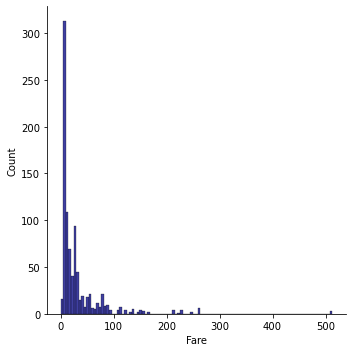

In [125]:
sns.displot(train['Fare'],color='navy')

In [126]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Robust Scaler를 써야한다

In [127]:
prediction=train[train['Age'].isna()]
train01=train[~train['Age'].isna()]

In [128]:
prediction

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0,3,0,NaN,0,0,8.4583,Q
17,18,1,2,0,NaN,0,0,13.0000,S
19,20,1,3,1,NaN,0,0,7.2250,C
26,27,0,3,0,NaN,0,0,7.2250,C
28,29,1,3,1,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...,...
859,860,0,3,0,NaN,0,0,7.2292,C
863,864,0,3,1,NaN,8,2,69.5500,S
868,869,0,3,0,NaN,0,0,9.5000,S
878,879,0,3,0,NaN,0,0,7.8958,S


In [129]:
train01.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [130]:
train01

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,1,39.0,0,5,29.1250,Q
886,887,0,2,0,27.0,0,0,13.0000,S
887,888,1,1,1,19.0,0,0,30.0000,S
889,890,1,1,0,26.0,0,0,30.0000,C


In [131]:
features=['Survived','Sex','Pclass','SibSp','Parch','Fare']
target='Age'

In [132]:
train01['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
885    29.1250
886    13.0000
887    30.0000
889    30.0000
890     7.7500
Name: Fare, Length: 714, dtype: float64

In [133]:
rs=RobustScaler()
train01['Fare']=rs.fit_transform(train01['Fare'].to_frame(name='Fare'))

<ipython-input-133-1c8d231bb0c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train01['Fare']=rs.fit_transform(train01['Fare'].to_frame(name='Fare'))


In [134]:
train01

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,-0.335309,S
1,2,1,1,1,38.0,1,0,2.193153,C
2,3,1,3,1,26.0,0,0,-0.308655,S
3,4,1,1,1,35.0,1,0,1.475155,S
4,5,0,3,0,35.0,0,0,-0.303720,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,1,39.0,0,5,0.528462,Q
886,887,0,2,0,27.0,0,0,-0.108261,S
887,888,1,1,1,19.0,0,0,0.563013,S
889,890,1,1,0,26.0,0,0,0.563013,C


In [135]:
X_train=train01[features]
X_test=prediction[features]
Y_train=train01[target]
Y_train=Y_train.astype(int)

In [136]:
dmt=DecisionTreeClassifier(random_state=156)
dmt.fit(X_train,Y_train)


DecisionTreeClassifier(random_state=156)

In [137]:
X_prediction=dmt.predict(X_test)

In [138]:
X_prediction

array([28, 14, 32, 28, 32, 28, 35, 32, 32, 28, 28, 24, 32, 24, 35, 35,  1,
       28, 28, 32, 28, 28, 28, 32, 32, 28, 28, 31, 48, 28, 28,  1, 50, 35,
        1, 16, 35, 35, 32, 28, 32,  1, 24, 28,  3, 31, 31, 32, 28, 35, 28,
       31, 35, 32, 40, 35, 35, 35, 32, 32, 14, 28, 35,  1, 32, 35, 28, 32,
       35, 28, 32, 32, 24, 32, 32, 35, 28, 28,  3, 28, 28, 40, 31, 28, 28,
       28, 32, 32, 24, 28, 35, 28, 28, 40, 28, 28, 35, 40,  3, 24, 28, 28,
       31, 35, 28, 28, 28, 28, 35, 28,  4, 28, 14, 28, 35, 28, 28, 31, 28,
       32, 31, 28, 28, 48, 35, 28, 28, 35, 28, 32, 28, 28, 47, 24, 32, 28,
       28, 32, 28, 28, 35, 40, 31, 32, 32,  1, 35, 28, 32, 40, 28, 28, 35,
       28, 35, 24, 28, 28, 28, 16, 28, 16, 35, 47, 28, 28, 32, 28, 28, 35,
        1, 35, 28, 16, 28, 28, 48])

In [139]:
prediction

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0,3,0,NaN,0,0,8.4583,Q
17,18,1,2,0,NaN,0,0,13.0000,S
19,20,1,3,1,NaN,0,0,7.2250,C
26,27,0,3,0,NaN,0,0,7.2250,C
28,29,1,3,1,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...,...
859,860,0,3,0,NaN,0,0,7.2292,C
863,864,0,3,1,NaN,8,2,69.5500,S
868,869,0,3,0,NaN,0,0,9.5000,S
878,879,0,3,0,NaN,0,0,7.8958,S


In [140]:
prediction.reset_index(inplace=True)
for i in range(0,177):
    prediction['Age'][i]=X_prediction[i]

<ipython-input-140-77640a8caf64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction['Age'][i]=X_prediction[i]
C:\Users\suyeo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [141]:
prediction

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,5,6,0,3,0,28.0,0,0,8.4583,Q
1,17,18,1,2,0,14.0,0,0,13.0000,S
2,19,20,1,3,1,32.0,0,0,7.2250,C
3,26,27,0,3,0,28.0,0,0,7.2250,C
4,28,29,1,3,1,32.0,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
172,859,860,0,3,0,28.0,0,0,7.2292,C
173,863,864,0,3,1,16.0,8,2,69.5500,S
174,868,869,0,3,0,28.0,0,0,9.5000,S
175,878,879,0,3,0,28.0,0,0,7.8958,S


In [142]:
new=pd.concat([train01,prediction],axis=0)

In [143]:
new=new.sort_index()

In [144]:
new.fillna(0,inplace=True)

In [145]:
features=['Sex','Pclass','SibSp','Parch','Fare']
target='Age'
prediction=test[test['Age'].isna()]
train01=test[~test['Age'].isna()]
X_train=train01[features]
X_test=prediction[features]
Y_train=train01[target]
X_train.fillna(0,inplace=True)
Y_train=Y_train.astype(int)
dmt=DecisionTreeClassifier(random_state=156)
dmt.fit(X_train,Y_train)
X_prediction=dmt.predict(X_test)
prediction.reset_index(inplace=True)
for i in range(0,len(X_prediction)):
    prediction['Age'][i]=X_prediction[i]
prediction=prediction.set_index('index')
test=pd.concat([train01,prediction],axis=0)
test=test.sort_index()

C:\Users\suyeo\Anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-145-50e8ca3bdee6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction['Age'][i]=X_prediction[i]
C:\Users\suyeo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [146]:
features=['Pclass','Sex','Age','SibSp','Parch','Fare']
target='Survived'

In [147]:
X_train=new[features]
X_test=test[features]
Y_train=new[target]

In [148]:
dmt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=156)

In [149]:
X_test.fillna(0,inplace=True)

C:\Users\suyeo\Anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [150]:
result=dmt.predict(X_test)

In [151]:
result

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,

In [152]:
submission_result=submission.copy()

In [153]:
submission_result['Survived']=result

In [154]:
submission_result.to_csv("submission.csv",index=False)